In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [34]:
df=pd.read_csv(r"C:\Users\Bhupender Singh\Downloads\ola(1).csv")

In [35]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137


In [36]:
df.shape

(10886, 9)

In [37]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  str    
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        9254 non-null   float64
 4   humidity    9254 non-null   float64
 5   windspeed   9254 non-null   float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  float64
dtypes: float64(4), int64(4), str(1)
memory usage: 765.6 KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.000000,1.000000,2.000000,3.000000,4.000000
weather,10886.0,2.491916,1.123139,1.000000,1.000000,2.000000,4.000000,4.000000
temp,9254.0,23.240116,20.311144,-22.743852,12.470555,20.743790,29.394576,211.102548
humidity,9254.0,124.452421,75.568291,32.713561,87.846187,112.180064,137.301002,672.687236
windspeed,9254.0,34.549616,28.417263,-1.407737,17.963252,30.945593,44.029018,244.921965
casual,10886.0,24.517545,14.390014,0.000000,12.000000,25.000000,37.000000,49.000000
registered,10886.0,99.551442,57.541131,0.000000,50.000000,100.000000,149.000000,199.000000
count,10886.0,224.177267,75.228602,-12.769738,170.140221,224.257587,278.407366,464.839068


In [39]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4


In [40]:
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,2011,1,1


In [41]:
from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan 

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,2011,0


In [42]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,2011,0,0


In [43]:
df.drop(['datetime', 'date'],
        axis=1,
        inplace=True)

In [44]:
df.shape

(10886, 14)

In [45]:
df.isnull().sum()

season           0
weather          0
temp          1632
humidity      1632
windspeed     1632
casual           0
registered       0
count            0
time             0
day              0
month            0
year             0
weekday          0
am_or_pm         0
dtype: int64

In [46]:
df.ffill(inplace=True)

,season,weather,temp,humidity,windspeed,casual,registered,count,time,day,month,year,weekday,am_or_pm
0,3,2,7.653428,122.430885,18.783703,5,128,315.731778,0,1,1,2011,0,0
1,4,3,13.269244,101.703802,14.035245,36,184,340.457093,1,1,1,2011,0,0
2,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2,1,1,2011,0,0
3,3,1,10.463377,114.925671,25.347168,6,47,132.169549,3,1,1,2011,0,0
4,3,4,30.214783,149.193592,20.288982,14,199,315.867137,4,1,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,4,33.199573,106.416630,14.284576,48,28,177.565718,9,29,3,2012,1,0
10882,3,4,16.149249,69.572176,24.725833,4,1,113.712131,10,29,3,2012,1,0
10883,3,3,20.303661,148.447082,40.606129,38,10,209.684018,11,29,3,2012,1,0
10884,2,4,17.425577,135.793223,50.788697,36,15,149.063403,12,29,3,2012,1,1


In [47]:
df.isnull().sum()

season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
dtype: int64

In [48]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   weather     10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   humidity    10886 non-null  float64
 4   windspeed   10886 non-null  float64
 5   casual      10886 non-null  int64  
 6   registered  10886 non-null  int64  
 7   count       10886 non-null  float64
 8   time        10886 non-null  int64  
 9   day         10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  year        10886 non-null  int32  
 12  weekday     10886 non-null  int64  
 13  am_or_pm    10886 non-null  int64  
dtypes: float64(4), int32(3), int64(7)
memory usage: 1.0 MB


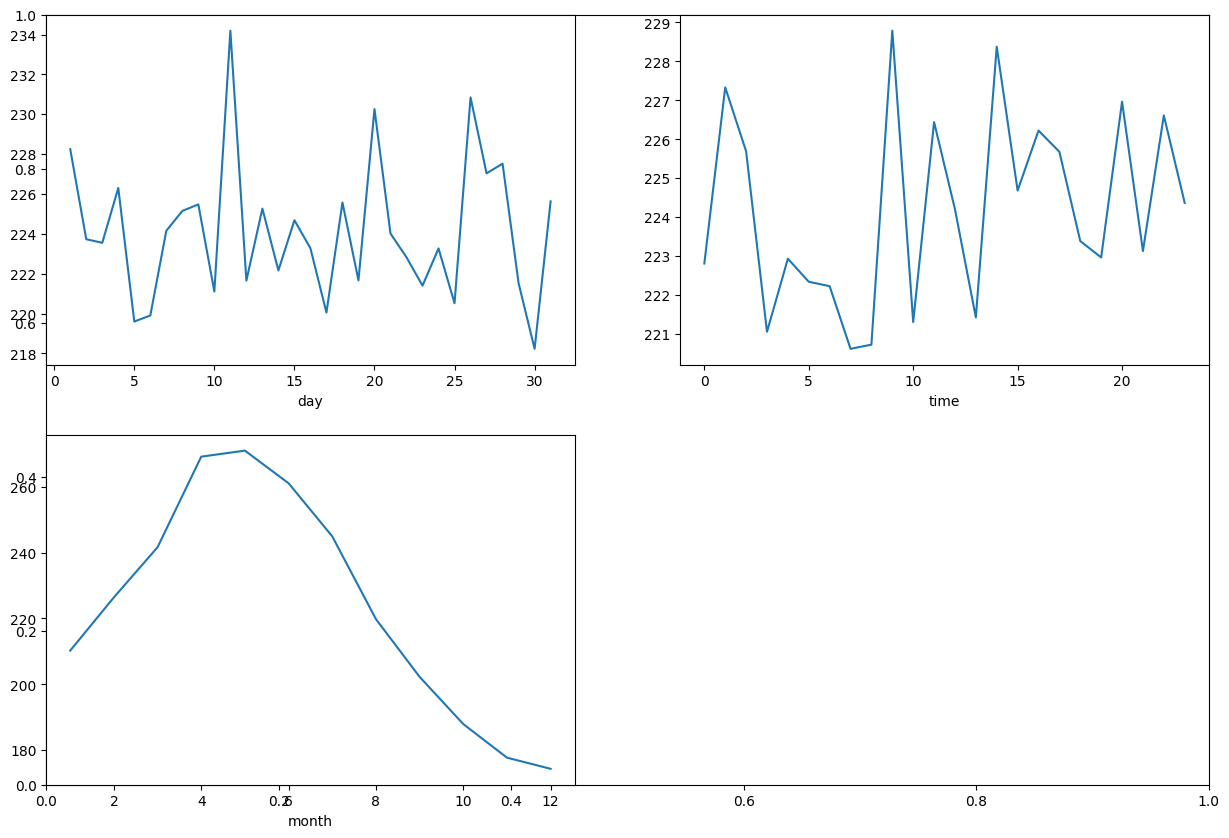

In [49]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()

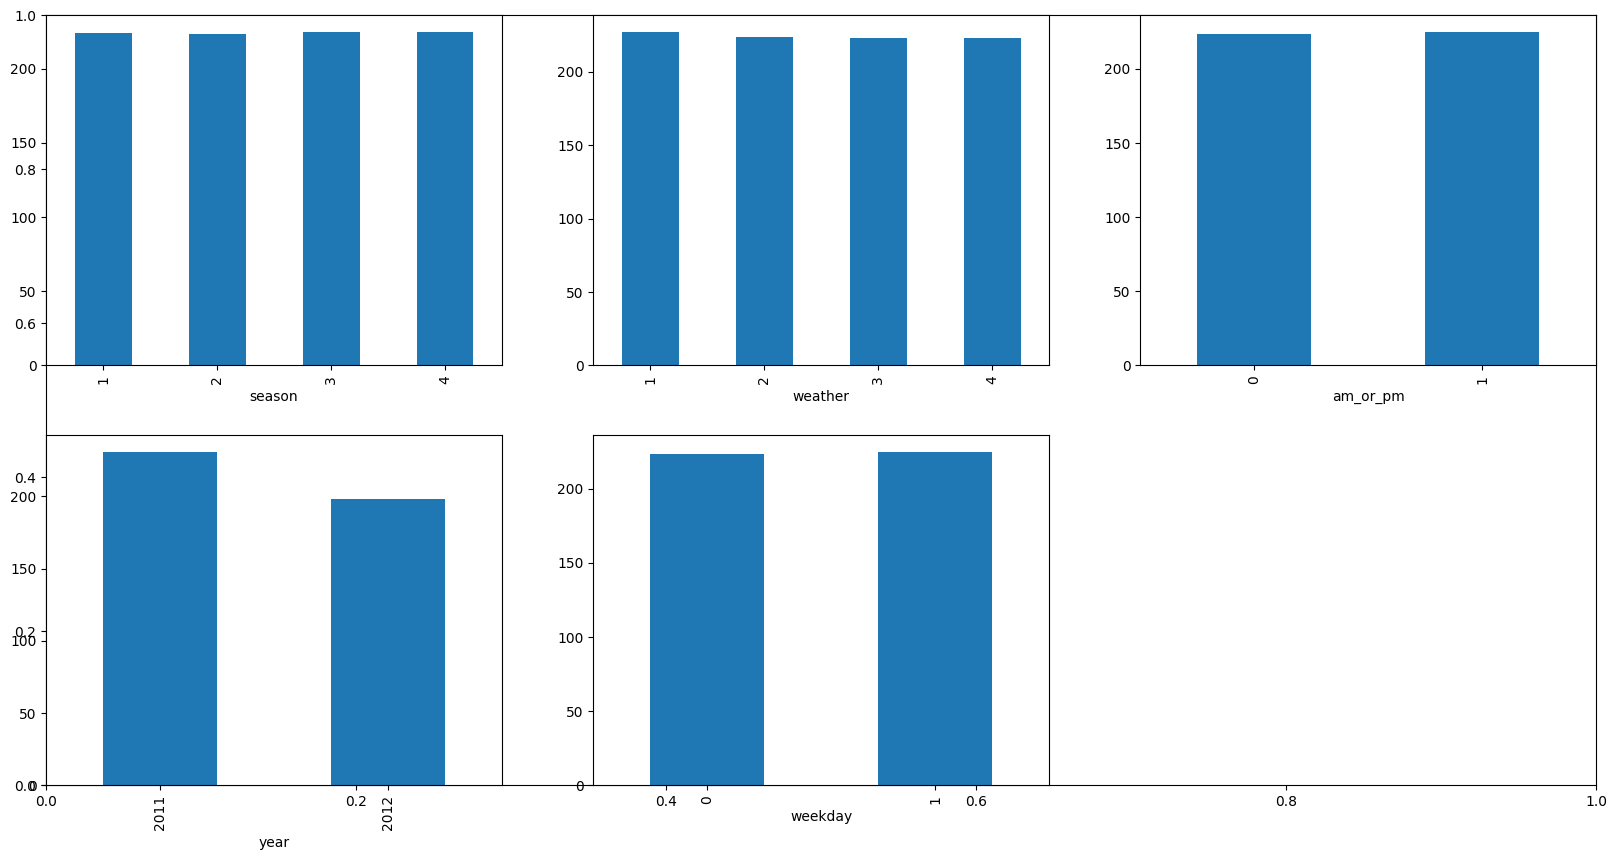

In [51]:
features = ['season', 'weather',\
            'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()

C:\Users\Bhupender Singh\AppData\Local\Temp\ipykernel_25856\275871270.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Bhupender Singh\AppData\Local\Temp\ipykernel_25856\275871270.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


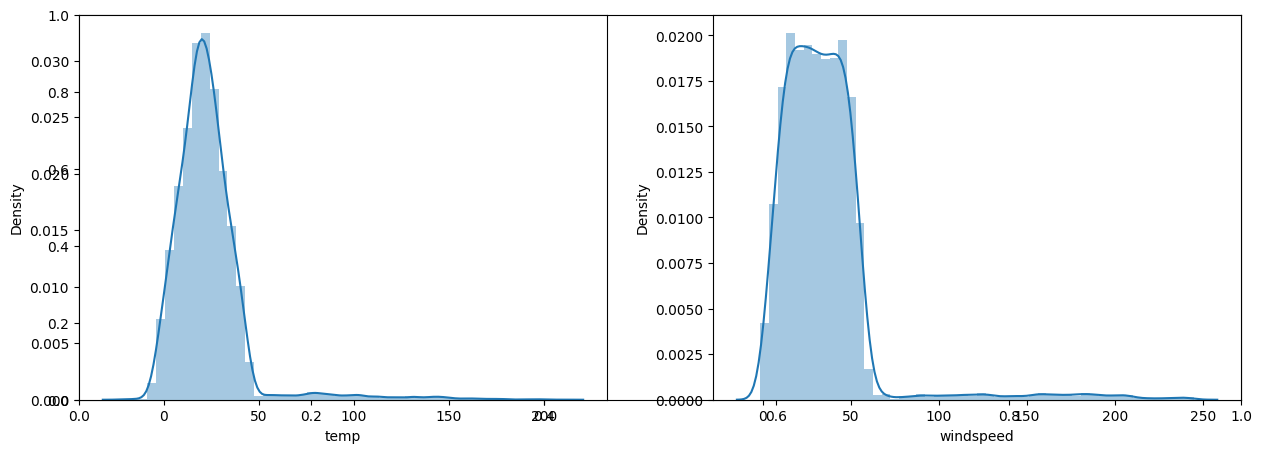

In [52]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()

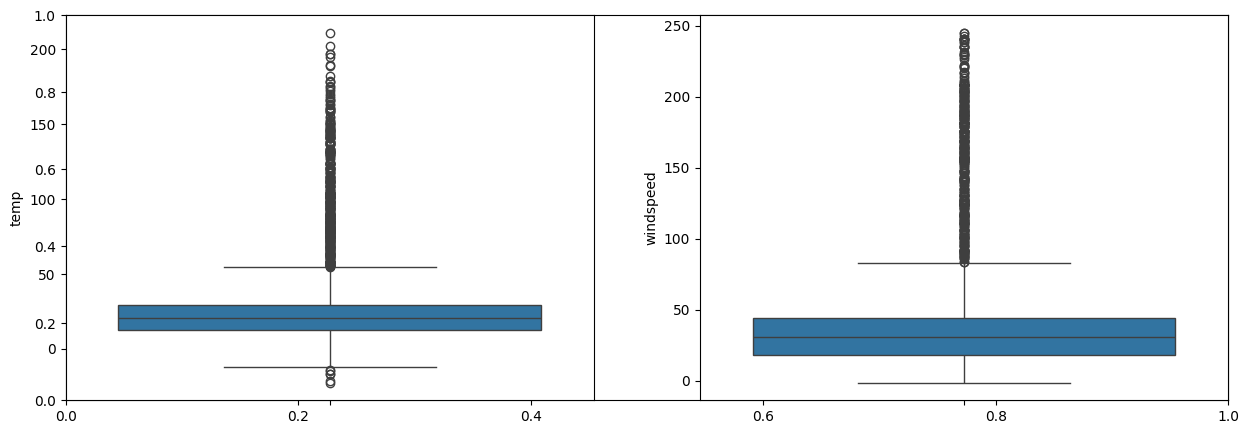

In [53]:


plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()

In [54]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape

((9797, 13), (1089, 13))

In [82]:
Y_train

array([167.35547936, 164.5695221 , 296.64963345, ..., 243.79819567,
       135.0190967 ,  66.14712373], shape=(9797,))

In [83]:
Y_train = Y_train.astype(int)
Y_val  = Y_val.astype(int)


In [84]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [86]:
df

,season,weather,temp,humidity,windspeed,casual,registered,count,time,day,month,year,weekday,am_or_pm
0,3,2,7.653428,122.430885,18.783703,5,128,315.731778,0,1,1,2011,0,0
1,4,3,13.269244,101.703802,14.035245,36,184,340.457093,1,1,1,2011,0,0
2,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2,1,1,2011,0,0
3,3,1,10.463377,114.925671,25.347168,6,47,132.169549,3,1,1,2011,0,0
4,3,4,30.214783,149.193592,20.288982,14,199,315.867137,4,1,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,4,33.199573,106.416630,14.284576,48,28,177.565718,9,29,3,2012,1,0
10882,3,4,16.149249,69.572176,24.725833,4,1,113.712131,10,29,3,2012,1,0
10883,3,3,20.303661,148.447082,40.606129,38,10,209.684018,11,29,3,2012,1,0
10884,2,4,17.425577,135.793223,50.788697,36,15,149.063403,12,29,3,2012,1,1


In [87]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [88]:
le=LinearRegression()
le.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [106]:
y_pred_linear = le.predict(X_val)


In [107]:
y_pred_linear

array([300.86334458, 259.82392257, 153.07345195, ..., 131.41231261,
       147.6352982 , 153.00190295], shape=(1089,))

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(Y_val, y_pred_linear)
mse = mean_squared_error(Y_val, y_pred_linear)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)


MAE : 28.625361916662573
MSE : 1296.9803763634682
RMSE: 36.01361376429014


In [109]:
from sklearn.svm import SVC

ss = SVC()
ss.fit(X_train, Y_train)     # train model
y_pred_SVC = ss.predict(X_val) # predict


In [110]:
y_pred_SVC

array([278, 265, 191, ..., 162, 179, 199], shape=(1089,))

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(Y_val, y_pred_SVC)
mse = mean_squared_error(Y_val, y_pred_SVC)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)


MAE : 37.484848484848484
MSE : 2173.775022956841
RMSE: 46.62376028332379


In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
RR=RandomForestRegressor()

In [99]:
RR.fit(X_train,Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [112]:
y_pred_RFR=RR.predict(X_val)

In [113]:
y_pred_RFR

array([324.33, 258.54, 151.15, ..., 122.51, 144.22, 187.32], shape=(1089,))

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(Y_val, y_pred_RFR)
mse = mean_squared_error(Y_val, y_pred_RFR)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)

MAE : 25.449862258953168
MSE : 997.0998279155187
RMSE: 31.57688755902834
